## 00 packages

In [7]:
##########################################################################################
##########################################################################################

import networkx as nx

from shapely.geometry import Point,Polygon

import math

import random

##########################################################################################
##########################################################################################

import numpy as np

import pandas as pd

##########################################################################################
##########################################################################################

import matplotlib

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

##########################################################################################
##########################################################################################

from itertools import combinations, permutations

from itertools import islice

##########################################################################################
##########################################################################################

import copy


### 01 parameters

In [8]:
##########################################################################################
##########################################################################################

alpha=1

batch_interval=1

##########################################################################################
##########################################################################################

speed=10000/60

##########################################################################################
##########################################################################################

save_path="./03result/03Multi-hop/"

##########################################################################################
##########################################################################################

lambda_values = [5,10,20]

patterns=['uniform','centralized']#'centralized','uniform'

##########################################################################################
##########################################################################################

alphas=[1.0,1.2,1.4,1.6,1.8,2.0]

##########################################################################################
##########################################################################################

def calculate_distance(schedules):
    
    tt_dis=0
    
    for schedule in schedules.values():
        
        trajectory=list(schedule.values())

        for i in range(1, len(trajectory),1):
                
            tt_dis+=Point(trajectory[i-1]).distance(Point(trajectory[i]))
                
    return tt_dis/1000.0

##########################################################################################
##########################################################################################

def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened


### 01 total distances

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


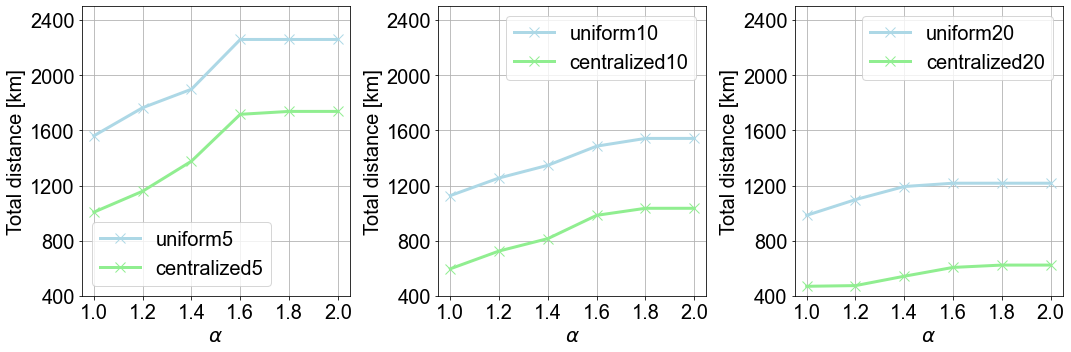

In [9]:
##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 20}


figure, axs = plt.subplots(1,3,figsize=(15,5))

for i in range(3):

    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels()

    [label.set_fontsize(20) for label in labels]

    [label.set_fontname('Arial') for label in labels]
    
    axs[i].grid()

##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']

colors=['lightblue','lightgreen']

##########################################################################################
##########################################################################################

figure_idx=0

for lambda_value in lambda_values:
    
    color_idx=0

    for pattern in patterns:
        
        ##########################################################################################
        ##########################################################################################
        
        instance_name=pattern+str(lambda_value)
        
        ##########################################################################################
        ##########################################################################################
        
        save_path="./03result/03Multi-hop/"+pattern+'_'+str(lambda_value)
        
        ##########################################################################################
        ##########################################################################################
        
        distance_records={}
        
        ##########################################################################################
        ##########################################################################################
        
        for alpha in alphas:
            
            ##########################################################################################
            ##########################################################################################
            
            parcel_df=pd.read_csv(save_path+"/parcel_df_"+str(alpha)+"_"+str(batch_interval)+".csv")
            
            parcel_df=parcel_df.drop(columns=['Unnamed: 0'])
            
            ##########################################################################################
            ##########################################################################################
    
            
            trajectory_schedules=np.load(save_path+"/trajectory_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()
            
            ##########################################################################################
            ##########################################################################################
            
            # 01 Total travel distance
            
            total_travel_distance=calculate_distance(trajectory_schedules)
            
            distance_records[alpha]=total_travel_distance
            
        ##########################################################################################
        ##########################################################################################
        
        distance_array=[]
        
        for distance in distance_records.values():
            
            if len(distance_array)>0:
                
                if distance<=max(distance_array):
                    
                    distance_array.append(max(distance_array))
                    
                else:
                    
                    distance_array.append(distance)
            
            else:
                
                distance_array.append(distance)
                
                
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].plot(alphas,distance_array,\
                             label=instance_name,linewidth=3,marker='x',markersize=10,color=colors[color_idx])
        
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].set_ylim([400,2500])
        
        ymajorLocator  = MultipleLocator(400)

        axs[figure_idx].yaxis.set_major_locator(ymajorLocator)
        
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].set_xlabel('$\\alpha$',font_label)

        axs[figure_idx].set_ylabel("Total distance [km]",font_label)
        
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].legend(loc=0,prop=font_legend,ncol=1)
        
        ##########################################################################################
        ##########################################################################################
        
        color_idx+=1
    
        
        
    figure_idx+=1
            
            
            
            
##########################################################################################
##########################################################################################



plt.tight_layout()

current_fig = plt.gcf() 

current_fig.savefig('./07figures/11alpha_distance.eps', format='eps', dpi=1000, bbox_inches = 'tight')

plt.show()


### 02 delivery distance

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


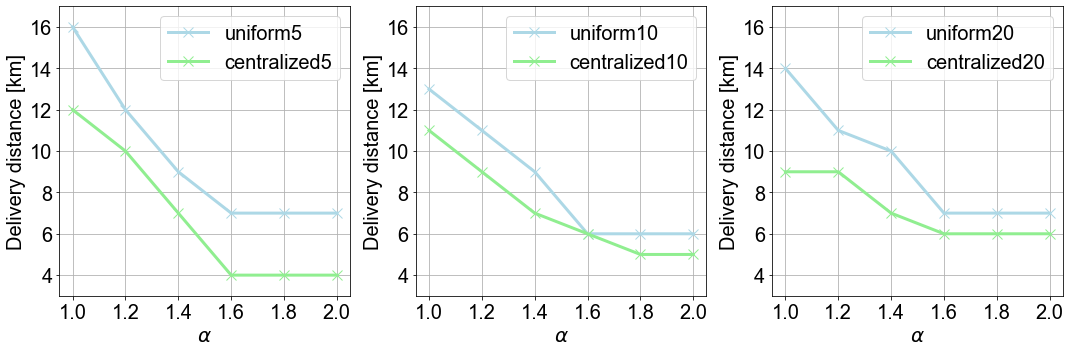

In [10]:
##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 20}


figure, axs = plt.subplots(1,3,figsize=(15,5))

for i in range(3):

    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels()

    [label.set_fontsize(20) for label in labels]

    [label.set_fontname('Arial') for label in labels]
    
    axs[i].grid()

##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']

colors=['lightblue','lightgreen']

##########################################################################################
##########################################################################################

figure_idx=0

for lambda_value in lambda_values:
    
    color_idx=0

    for pattern in patterns:
        
        ##########################################################################################
        ##########################################################################################
        
        instance_name=pattern+str(lambda_value)
        
        ##########################################################################################
        ##########################################################################################
        
        save_path="./03result/03Multi-hop/"+pattern+'_'+str(lambda_value)
        
        ##########################################################################################
        ##########################################################################################
        
        delivery_distance_records={}
        
        ##########################################################################################
        ##########################################################################################
        
        for alpha in alphas:
            
            parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()
                
            delivery_distances=list()

            for schedule in parcel_schedules.values():

                actual_delivery_time=0

                time_arrays=flatten_list([[y[1] for y in list(x.values())] for x in schedule.values()])

                for time_line in schedule.values():

                    actual_delivery_time+=time_line['drop_off'][1]-time_line['pick_up'][1]

                actual_delivery_distance=actual_delivery_time*speed/1000.0

                delivery_distances.append(actual_delivery_distance)

            average_delivery_distance=np.array(delivery_distances).mean()
                    
            average_delivery_distance=round(average_delivery_distance,0)
            
            delivery_distance_records[alpha]=average_delivery_distance
            
        ##########################################################################################
        ##########################################################################################
        
        distance_array=[]
        
        for distance in delivery_distance_records.values():
            
            if len(distance_array)>0:
                
                if distance>=min(distance_array):
                    
                    distance_array.append(min(distance_array))
                    
                else:
                    
                    distance_array.append(distance)
            
            else:
                
                distance_array.append(distance)
                
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].plot(alphas,distance_array,\
                             label=instance_name,linewidth=3,marker='x',markersize=10,color=colors[color_idx])
        
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].set_ylim([3,17])
        
        ymajorLocator  = MultipleLocator(2)

        axs[figure_idx].yaxis.set_major_locator(ymajorLocator)
        
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].set_xlabel('$\\alpha$',font_label)

        axs[figure_idx].set_ylabel("Delivery distance [km]",font_label)
        
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].legend(loc=0,prop=font_legend,ncol=1)
        
        ##########################################################################################
        ##########################################################################################
        
        color_idx+=1
    
        
        
    figure_idx+=1
            
            
            
            
##########################################################################################
##########################################################################################



plt.tight_layout()

current_fig = plt.gcf() 

current_fig.savefig('./07figures/12alpha_delivery_distance.eps', format='eps', dpi=1000, bbox_inches = 'tight')

plt.show()


### 03 RtC time

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


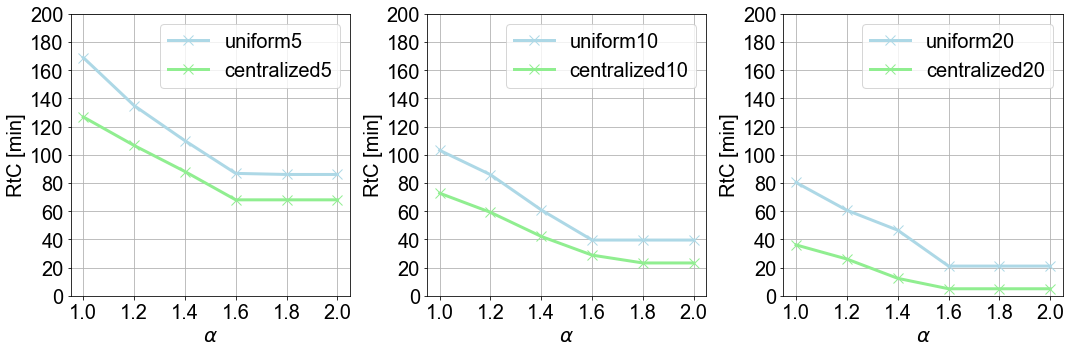

In [11]:
##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 20}


figure, axs = plt.subplots(1,3,figsize=(15,5))

for i in range(3):

    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels()

    [label.set_fontsize(20) for label in labels]

    [label.set_fontname('Arial') for label in labels]
    
    axs[i].grid()

##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']

colors=['lightblue','lightgreen']

##########################################################################################
##########################################################################################

figure_idx=0

for lambda_value in lambda_values:
    
    color_idx=0

    for pattern in patterns:
        
        ##########################################################################################
        ##########################################################################################
        
        instance_name=pattern+str(lambda_value)
        
        ##########################################################################################
        ##########################################################################################
        
        save_path="./03result/03Multi-hop/"+pattern+'_'+str(lambda_value)
        
        ##########################################################################################
        ##########################################################################################
        
        request_to_completion_times={}
        
        ##########################################################################################
        ##########################################################################################
        
        for alpha in alphas:
            
            parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()
                
            request_to_pickups=list()
                
            for parcel_id,schedule in parcel_schedules.items():

                time_arrays=flatten_list([[y[1] for y in list(x.values())] for x in schedule.values()])

                request_to_pickup=float(time_arrays[0]-float(parcel_df.loc[parcel_df.parcel_id==parcel_id,'t_a']))

                request_to_pickups.append(request_to_pickup)

            average_request_to_pickup=np.array(request_to_pickups).mean()
            
            delivery_times=list()
                
            for parcel_id,schedule in parcel_schedules.items():

                time_arrays=flatten_list([[y[1] for y in list(x.values())] for x in schedule.values()])

                delivery_time=time_arrays[-1]-time_arrays[0]

                delivery_times.append(delivery_time)

            average_delivery_time=np.array(delivery_times).mean()
                
            average_request_to_completion_time=average_delivery_time+average_request_to_pickup
            
            request_to_completion_times[alpha]=average_request_to_completion_time
            
        ##########################################################################################
        ##########################################################################################
        
        time_array=[]
        
        for c_time in request_to_completion_times.values():
            
            if len(time_array)>0:
                
                if c_time<=5:
                    
                    time_array.append(5)
                
                elif c_time>=min(time_array):
                    
                    time_array.append(min(time_array))
                    
                else:
                    
                    time_array.append(c_time)
            
            else:
                
                time_array.append(c_time)

        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].plot(alphas,time_array,\
                             label=instance_name,linewidth=3,marker='x',markersize=10,color=colors[color_idx])
        
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].set_ylim([0,200])
        
        ymajorLocator  = MultipleLocator(20)

        axs[figure_idx].yaxis.set_major_locator(ymajorLocator)
        
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].set_xlabel('$\\alpha$',font_label)

        axs[figure_idx].set_ylabel("RtC [min]",font_label)
        
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].legend(loc=0,prop=font_legend,ncol=1)
        
        ##########################################################################################
        ##########################################################################################
        
        color_idx+=1
    
        
        
    figure_idx+=1
            
            
            
            
##########################################################################################
##########################################################################################



plt.tight_layout()

current_fig = plt.gcf() 

current_fig.savefig('./07figures/13alpha_Rtc_time.eps', format='eps', dpi=1000, bbox_inches = 'tight')

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


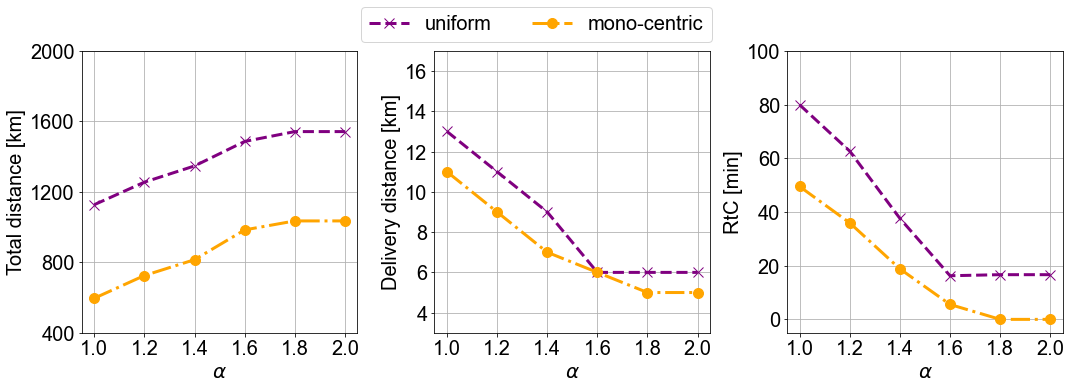

In [15]:
##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 20}


figure, axs = plt.subplots(1,3,figsize=(15,5))

for i in range(3):

    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels()

    [label.set_fontsize(20) for label in labels]

    [label.set_fontname('Arial') for label in labels]
    
    axs[i].grid()

##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']

colors=['purple','orange']

makers=['x','o']

linestyles=['--','-.']

labels=['uniform','mono-centric']

##########################################################################################
##########################################################################################

lambda_value=10

##########################################################################################
##########################################################################################


figure_idx=0

color_idx=0

for pattern in patterns:

    ##########################################################################################
    ##########################################################################################

    instance_name=pattern+str(lambda_value)

    ##########################################################################################
    ##########################################################################################

    save_path="./03result/03Multi-hop/"+pattern+'_'+str(lambda_value)

    ##########################################################################################
    ##########################################################################################

    distance_records={}

    ##########################################################################################
    ##########################################################################################

    for alpha in alphas:

        ##########################################################################################
        ##########################################################################################

        parcel_df=pd.read_csv(save_path+"/parcel_df_"+str(alpha)+"_"+str(batch_interval)+".csv")

        parcel_df=parcel_df.drop(columns=['Unnamed: 0'])

        ##########################################################################################
        ##########################################################################################


        trajectory_schedules=np.load(save_path+"/trajectory_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()

        ##########################################################################################
        ##########################################################################################

        # 01 Total travel distance

        total_travel_distance=calculate_distance(trajectory_schedules)

        distance_records[alpha]=total_travel_distance

    ##########################################################################################
    ##########################################################################################
    
    distance_array=list(distance_records.values())

#     distance_array=[]

#     for distance in distance_records.values():

#         if len(distance_array)>0:

#             if distance<=max(distance_array):

#                 distance_array.append(max(distance_array))

#             else:

#                 distance_array.append(distance)

#         else:

#             distance_array.append(distance)


    ##########################################################################################
    ##########################################################################################

    axs[figure_idx].plot(alphas,distance_array,\
                         label=labels[color_idx],linewidth=3,marker=makers[color_idx],markersize=10,color=colors[color_idx],linestyle=linestyles[color_idx])

    ##########################################################################################
    ##########################################################################################

    axs[figure_idx].set_ylim([400,2000])

    ymajorLocator  = MultipleLocator(400)

    axs[figure_idx].yaxis.set_major_locator(ymajorLocator)

    ##########################################################################################
    ##########################################################################################

    axs[figure_idx].set_xlabel('$\\alpha$',font_label)

    axs[figure_idx].set_ylabel("Total distance [km]",font_label)

    ##########################################################################################
    ##########################################################################################

    color_idx+=1
    
color_idx=0

figure_idx+=1

for pattern in patterns:

    ##########################################################################################
    ##########################################################################################

    instance_name=pattern+str(lambda_value)

    ##########################################################################################
    ##########################################################################################

    save_path="./03result/03Multi-hop/"+pattern+'_'+str(lambda_value)

    ##########################################################################################
    ##########################################################################################

    delivery_distance_records={}

    ##########################################################################################
    ##########################################################################################

    for alpha in alphas:

        parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()

        delivery_distances=list()

        for schedule in parcel_schedules.values():

            actual_delivery_time=0

            time_arrays=flatten_list([[y[1] for y in list(x.values())] for x in schedule.values()])

            for time_line in schedule.values():

                actual_delivery_time+=time_line['drop_off'][1]-time_line['pick_up'][1]

            actual_delivery_distance=actual_delivery_time*speed/1000.0

            delivery_distances.append(actual_delivery_distance)

        average_delivery_distance=np.array(delivery_distances).mean()

        average_delivery_distance=round(average_delivery_distance,0)

        delivery_distance_records[alpha]=average_delivery_distance

    ##########################################################################################
    ##########################################################################################
    
    distance_array=list(delivery_distance_records.values())

    distance_array=[]

    for distance in delivery_distance_records.values():

        if len(distance_array)>0:

            if distance>=min(distance_array):

                distance_array.append(min(distance_array))

            else:

                distance_array.append(distance)

        else:

            distance_array.append(distance)

    ##########################################################################################
    ##########################################################################################

    axs[figure_idx].plot(alphas,distance_array,linewidth=3,marker=makers[color_idx],markersize=10,color=colors[color_idx],linestyle=linestyles[color_idx])

    ##########################################################################################
    ##########################################################################################

    axs[figure_idx].set_ylim([3,17])

    ymajorLocator  = MultipleLocator(2)

    axs[figure_idx].yaxis.set_major_locator(ymajorLocator)

    ##########################################################################################
    ##########################################################################################

    axs[figure_idx].set_xlabel('$\\alpha$',font_label)

    axs[figure_idx].set_ylabel("Delivery distance [km]",font_label)


    ##########################################################################################
    ##########################################################################################

    color_idx+=1
    
color_idx=0

figure_idx+=1

##########################################################################################
##########################################################################################

for pattern in patterns:
        
        ##########################################################################################
        ##########################################################################################
        
        instance_name=pattern+" "+str(lambda_value)
        
        ##########################################################################################
        ##########################################################################################
        
        save_path="./03result/03Multi-hop/"+pattern+'_'+str(lambda_value)
        
        ##########################################################################################
        ##########################################################################################
        
        request_to_completion_times={}
        
        ##########################################################################################
        ##########################################################################################
        
        for alpha in alphas:
            
            parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()
                
            request_to_pickups=list()
                
            for parcel_id,schedule in parcel_schedules.items():

                time_arrays=flatten_list([[y[1] for y in list(x.values())] for x in schedule.values()])

                request_to_pickup=float(time_arrays[0]-float(parcel_df.loc[parcel_df.parcel_id==parcel_id,'t_a']))

                request_to_pickups.append(request_to_pickup)

            average_request_to_pickup=np.array(request_to_pickups).mean()
            
            delivery_times=list()
                
            for parcel_id,schedule in parcel_schedules.items():

                time_arrays=flatten_list([[y[1] for y in list(x.values())] for x in schedule.values()])

                delivery_time=time_arrays[-1]-time_arrays[0]

                delivery_times.append(delivery_time)

            average_delivery_time=np.array(delivery_times).mean()
                
            average_request_to_completion_time=average_delivery_time+average_request_to_pickup
            
            request_to_completion_times[alpha]=average_request_to_completion_time
            
        ##########################################################################################
        ##########################################################################################
        
        time_array=list(request_to_completion_times.values())
        
#         time_array=[]
        
#         for c_time in request_to_completion_times.values():
            
#             if len(time_array)>0:
                
#                 if c_time<=5:
                    
#                     time_array.append(5)
                
#                 elif c_time>=min(time_array):
                    
#                     time_array.append(min(time_array))
                    
#                 else:
                    
#                     time_array.append(c_time)
            
#             else:
                
#                 time_array.append(c_time)

        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].plot(alphas,time_array,linewidth=3,marker=makers[color_idx],markersize=10,color=colors[color_idx],linestyle=linestyles[color_idx])
        
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].set_ylim([-5,100])
        
        ymajorLocator  = MultipleLocator(20)

        axs[figure_idx].yaxis.set_major_locator(ymajorLocator)
        
        ##########################################################################################
        ##########################################################################################
        
        axs[figure_idx].set_xlabel('$\\alpha$',font_label)

        axs[figure_idx].set_ylabel("RtC [min]",font_label)
        
        ##########################################################################################
        ##########################################################################################
        
        color_idx+=1
            
##########################################################################################
##########################################################################################

lines = []

labels = []

for ax in figure.axes:
    
    axLine, axLabel = ax.get_legend_handles_labels()
    
    lines.extend(axLine)
    
    labels.extend(axLabel)

##########################################################################################
##########################################################################################

##########################################################################################
##########################################################################################

figure.legend(lines, labels,loc ='upper center',bbox_to_anchor=(0.5, 1.1),prop=font_legend,ncol=2)


plt.tight_layout()

current_fig = plt.gcf() 

current_fig.savefig('./07figures/11alpha.eps', format='eps', dpi=1000, bbox_inches = 'tight')

plt.show()
